# Hito 1
## Parte Teórica:

## ¿Qué es una red neuronal?
Una red neuronal es un modelo computacional inspirado en la estructura y el funcionamiento del cerebro humano. Se compone de nodos (neuronas artificiales) organizados en capas y conectados mediante pesos sinápticos. Estas redes son utilizadas para tareas de aprendizaje automático como clasificación, regresión y reconocimiento de patrones.

### Componentes principales de una red neuronal:
1. **Neuronas**: Elementos fundamentales que procesan la información.
2. **Capas**:
   - **Capa de entrada**: Recibe los datos de entrada.
   - **Capas ocultas**: Procesan la información aplicando funciones de activación.
   - **Capa de salida**: Genera el resultado final.
3. **Pesos y sesgos**: Parámetros ajustables que determinan la influencia de cada conexión.
4. **Funciones de activación**: Transforman la entrada de cada neurona y permiten la modelización de relaciones no lineales.
5. **Algoritmo de entrenamiento**: Método para ajustar los pesos y mejorar la precisión del modelo.

## Proceso de Backpropagation
El **backpropagation** es un algoritmo de optimización utilizado para entrenar redes neuronales. Su objetivo es ajustar los pesos de la red para minimizar el error en la predicción.

### Pasos del backpropagation:
1. **Propagación hacia adelante**: Se calcula la salida de la red neuronal mediante los valores actuales de los pesos.
2. **Cálculo del error**: Se compara la salida obtenida con la salida esperada y se calcula el error utilizando una función de pérdida.
3. **Propagación hacia atrás**:
   - Se calcula el gradiente del error con respecto a los pesos de la red.
   - Se actualizan los pesos mediante el algoritmo de optimización (ej. descenso de gradiente).
4. **Repetición**: El proceso se repite hasta que el error sea mínimo y la red alcance un buen desempeño.

### Importancia del Backpropagation:
- Permite el ajuste eficiente de los pesos de la red.
- Es fundamental para el entrenamiento de redes neuronales profundas.
- Ayuda a mejorar la precisión del modelo en tareas complejas.

## Funciones de Activación Comunes
Las funciones de activación transforman la entrada de cada neurona y permiten modelar relaciones no lineales. A continuación, se describen tres funciones populares:

1. **Sigmoide**
   - Rango de salida: (0, 1)
   - Suaviza los valores de entrada y es útil para problemas de clasificación binaria.
   - Desventaja: Puede causar problemas de gradientes pequeños, ralentizando el entrenamiento.

2. **ReLU (Rectified Linear Unit)**
   - Define la salida como: f(x) = max(0, x).
   - Ventajas: Simple, eficiente y mitiga el problema del gradiente que desaparece.
   - Desventaja: No activa neuronas con entradas negativas ("Neuronas muertas").

3. **Tangente Hiperbólica (Tanh)**
   - Rango de salida: (-1, 1).
   - Proporciona valores más amplios que la sigmoide, lo que mejora la propagación del gradiente.
   - Útil en redes que requieren modelar relaciones más complejas.


# Hito 1
## Parte Práctica:
- Utilice el dataset proporcionado para desarrollar un modelo de red neuronal que detecte transacciones fraudulentas: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- Cargue el dataset en tu Jupyter Notebook.


In [14]:
# Importaciones básicas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

# Datasets y métricas
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#Cargar el conjunto de datos
df = pd.read_csv('../Datos/creditcard.csv')

# dimensión del conjunto de datos (filas, columnas)
print("\nDimensión del conjunto de datos (filas, columnas):")
print(df.shape)

# información general del DataFrame
print("\nInformación general del DataFrame:")
df.info()

# Imprime las primeras filas del DataFrame
df.head()



Dimensión del conjunto de datos (filas, columnas):
(284807, 31)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
# Identificar valores faltantes
display(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Preprocese los datos, incluyendo la normalización de las características.

In [20]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las características numéricas para normalizar
numeric_features = ['Time', 'Amount']
scaler = StandardScaler()

# Escalador
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df.head())


       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

- Construya una red neuronal simple utilizando Keras.

In [7]:
# Definir el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(df.shape[1]-1,))) # capa de entrada con 64 neuronas
model.add(Dense(32, activation='relu')) # capa oculta con 32 neuronas
model.add(Dense(1, activation='sigmoid')) # capa de salida

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Separar las características (X) y la variable objetivo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Entrenar el modelo
model.fit(X, y, epochs=10, batch_size=32)

# Evaluar el modelo (opcional)
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

C:\Users\dfbat\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9981 - loss: 0.0135
Epoch 2/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9994 - loss: 0.0028
Epoch 3/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9993 - loss: 0.0029
Epoch 4/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9994 - loss: 0.0024
Epoch 5/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9995 - loss: 0.0023
Epoch 6/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9995 - loss: 0.0023
Epoch 7/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9995 - loss: 0.0021
Epoch 8/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9995 - loss: 0.0019
Epoch 9/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9996 - loss: 0.0017
Epoch 10/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9996 - loss: 0.0020
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0018
Loss: 0.001686695497483015, Acc

- Entrene el modelo y evalúe su precisión en un conjunto de datos de prueba.

In [22]:
# Separar los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% para entrenamiento, 20% para prueba


# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train, epochs=10, batch_size=32)


# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss en datos de prueba: {loss}, Accuracy en datos de prueba: {accuracy}")

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9996 - loss: 0.0018
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9996 - loss: 0.0016
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9997 - loss: 0.0015
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9996 - loss: 0.0016
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9997 - loss: 0.0015
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9996 - loss: 0.0014
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9997 - loss: 0.0012
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9997 - loss: 0.0012
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9997 - loss: 0.0012
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9997 - loss: 0.0013
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9994 - loss: 0.0025
Loss en datos de prueba: 0.00252

- Visualice las pérdidas y la precisión durante el entrenamiento.

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9997 - loss: 0.0010 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9995 - val_loss: 0.0031
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9997 - loss: 9.2266e-04 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9997 - los

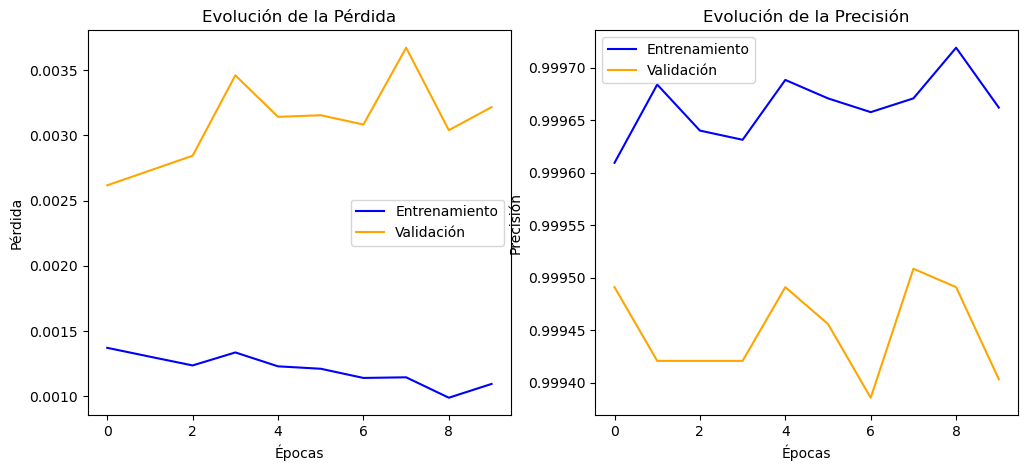

In [26]:
# Entrenar el modelo y almacenar el historial
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Extraer los valores de pérdida y precisión
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Crear las gráficas de pérdida y precisión
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de pérdida
ax[0].plot(train_loss, label='Entrenamiento', color='blue')
ax[0].plot(val_loss, label='Validación', color='orange')
ax[0].set_title('Evolución de la Pérdida')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('Pérdida')
ax[0].legend()

# Gráfico de precisión
ax[1].plot(train_acc, label='Entrenamiento', color='blue')
ax[1].plot(val_acc, label='Validación', color='orange')
ax[1].set_title('Evolución de la Precisión')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Precisión')
ax[1].legend()

plt.show()